In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import g_key

## Indices by country

In [2]:
# Load the indices_country csv from input data folder
countries_csv = "Data/Cost_of_living_indices_data.csv"

indices_countries = pd.read_csv(countries_csv)
indices_countries

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [3]:
# Remove the Rank column as it doesn't add any value here
indices_countries = indices_countries.drop(["Rank"],axis=1)
indices_countries

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...
134,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [4]:
# Identify the Min and Max scores for each index
indices_countries.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [5]:
# dataframe for min and max values of each index

# min values
min_values = indices_countries[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]].min()

# max values
max_values = indices_countries[["Cost of Living Index","Rent Index","Cost of Living Plus Rent Index","Groceries Index","Restaurant Price Index","Local Purchasing Power Index"]].max()

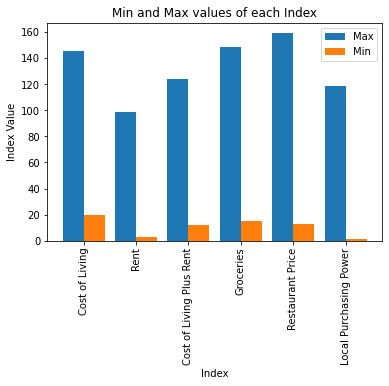

In [6]:
# Plot bar chart with the max and min values of all indices
X = ["Cost of Living", "Rent", "Cost of Living Plus Rent", "Groceries", "Restaurant Price", "Local Purchasing Power"]
Ymax = max_values
Zmin = min_values

#n=len(X)
#r = np.arange(n)
#width = 0.25
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ymax, 0.4, label = "Max")
plt.bar(X_axis + 0.2, Zmin, 0.4, label = "Min")
  
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Index")
plt.ylabel("Index Value")
plt.title("Min and Max values of each Index")
plt.legend()
plt.show()

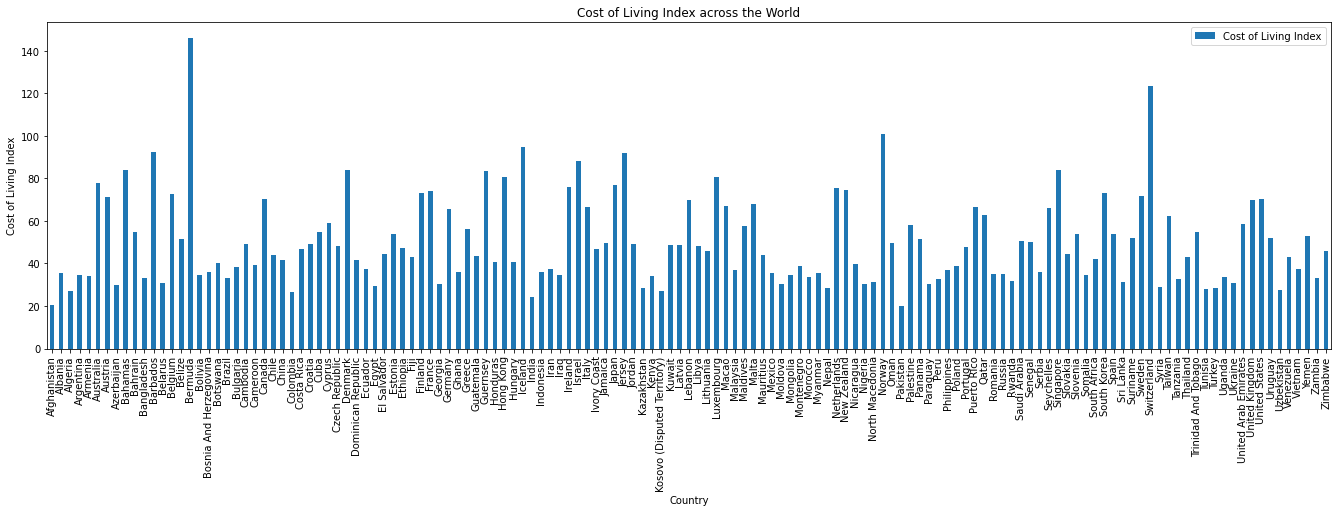

In [34]:
# Plot Cost of Living Index for all countries
plot = indices_countries.plot.bar(figsize=(23,6),x="Country", y="Cost of Living Index")  

# Set the xlabel and ylabel using class methods
plt.title("Cost of Living Index across the World")
plt.xlabel("Country")
plt.ylabel("Cost of Living Index")
plt.show()

In [7]:
# Get the Lat and Lng details for all countries for heatmap
indices_countries[["Lat","Lng"]] = ""

In [8]:
# find lat and lng values for each country
base_url = f"https://maps.googleapis.com/maps/api/geocode/json"

# set up the required parameters
params = {
    "key": g_key,
}

# set up lists to hold reponse info
lat = []
lng = []

# Loop through the list of cities and perform a request for data on each
for country in indices_countries["Country"]:
    #base_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={country}&key={g_key}"
    
    #   add location to params dict
    params["address"] = country
    
    geo_data = requests.get(base_url,params).json()
    
    lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
    lng.append(geo_data["results"][0]["geometry"]["location"]["lng"])

indices_countries["Lat"] = lat
indices_countries["Lng"] = lng
indices_countries

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,33.939110,67.709953
1,Albania,35.50,8.47,22.83,29.32,25.82,30.19,41.153332,20.168331
2,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,28.033886,1.659626
3,Argentina,34.69,7.71,22.04,28.17,33.32,30.72,-38.416097,-63.616672
4,Armenia,33.89,11.61,23.45,27.59,30.55,28.86,40.069099,45.038189
...,...,...,...,...,...,...,...,...,...
134,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41,6.423750,-66.589730
135,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38,14.058324,108.277199
136,Yemen,53.14,6.71,31.38,67.12,24.74,14.41,15.552727,48.516388
137,Zambia,33.04,9.26,21.90,31.53,22.46,40.33,-13.133897,27.849332


In [9]:
# Save Data Frame as a csv file 
indices_countries.to_csv("Data/output_all_countries_lat_lng.csv", index=False)

## Top 10 performing countries by Cost of Living Index

In [10]:
# Create the list of top 10 performing countries by Cost of Living Index
Df_1 = indices_countries.sort_values(["Cost of Living Index"]).reset_index(drop=True)

# Top 10 Countries DataFrame Output
top_10_countries = Df_1.head(10)

# Output
top_10_countries

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Pakistan,19.92,3.91,12.42,17.81,15.54,26.63,30.375321,69.345116
1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04,33.939110,67.709953
2,India,24.43,5.30,15.47,26.43,17.56,49.72,20.593684,78.962880
3,Colombia,26.72,8.18,18.03,23.47,19.44,28.85,4.570868,-74.297333
4,Algeria,26.87,4.59,16.43,28.82,14.48,24.63,28.033886,1.659626
5,Kosovo (Disputed Territory),27.05,8.04,18.14,24.84,19.53,43.86,42.602636,20.902977
6,Uzbekistan,27.31,9.29,18.86,26.83,24.22,22.37,41.377491,64.585262
7,Tunisia,27.87,5.32,17.30,27.36,15.96,27.83,33.886917,9.537499
8,Nepal,28.29,3.96,16.89,26.45,20.41,22.96,28.394857,84.124008
9,Turkey,28.31,6.63,18.15,22.64,18.40,32.88,38.963745,35.243322


## Bottom 10 performing countries by Cost of Living Index

In [11]:
# Create the list of top 10 performing countries by Cost of Living Index
Bottom_10_Countries_df = Df_1.tail(10).sort_values(["Cost of Living Index"],ascending=False).reset_index(drop=True)

Bottom_10_Countries_df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Bermuda,146.04,98.58,123.80,148.66,159.17,81.07,32.307800,-64.750500
1,Switzerland,123.35,53.54,90.62,128.13,122.09,118.44,46.818188,8.227512
2,Norway,100.90,34.68,69.86,97.31,105.49,83.11,60.472024,8.468946
3,Iceland,94.86,41.93,70.05,90.22,99.42,77.06,64.963051,-19.020835
4,Barbados,92.37,21.99,59.38,87.81,78.18,32.08,13.193887,-59.543198
5,Jersey,92.02,65.33,79.51,76.88,94.65,79.14,49.213771,-2.135766
6,Israel,88.05,33.94,62.69,76.72,95.31,75.58,31.046051,34.851612
7,Denmark,84.12,33.23,60.26,68.60,98.75,99.45,56.263920,9.501785
8,Bahamas,84.00,35.34,61.19,70.59,89.09,45.07,25.034280,-77.396280
9,Singapore,83.98,66.43,75.75,77.08,61.17,91.34,1.352083,103.819836


## G8 Countries

In [12]:
# Create a list of G8 countries
G8_countries = ["Japan", "United States", "United Kingdom", "Canada", "Germany", "Italy", "France", "Russia"]

In [13]:
# create a dataframe containing the data for the G8 countries
df_g8 = indices_countries[indices_countries["Country"].isin(G8_countries)].reset_index(drop=True)
df_g8

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Lat,Lng
0,Canada,70.22,34.33,53.40,70.01,67.86,87.98,56.130366,-106.346771
1,France,74.13,25.33,51.26,73.64,71.84,85.41,46.227638,2.213749
2,Germany,65.58,27.62,47.78,52.31,60.91,103.08,51.165691,10.451526
3,Italy,66.47,20.55,44.95,57.95,70.58,61.74,41.871940,12.567380
4,Japan,77.03,25.86,53.04,81.31,45.40,87.11,36.204824,138.252924
5,Russia,35.26,13.09,24.87,29.86,34.56,37.41,61.524010,105.318756
6,United Kingdom,69.65,31.84,51.93,56.58,76.79,88.78,55.378051,-3.435973
7,United States,70.13,42.07,56.98,70.37,70.07,106.34,37.090240,-95.712891


In [14]:
# Save Data Frame as a csv file 
df_g8.to_csv("Data/output_g8_countries_cost_of_living.csv", index=False)

## Indices by city

In [15]:
# Load the indices_country csv from input data folder
cities_csv = "Data/indices_cities.csv"

indices_cities = pd.read_csv(cities_csv)
indices_cities

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,2,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,3,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,4,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,5,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
...,...,...,...,...,...,...,...,...
573,574,"Kanpur, India",20.79,3.60,12.73,22.19,13.31,38.83
574,575,"Karachi, Pakistan",20.75,4.84,13.29,18.48,15.21,29.16
575,576,"Rawalpindi, Pakistan",20.52,4.78,13.14,18.51,16.18,22.91
576,577,"Multan, Pakistan",18.68,2.94,11.30,18.37,11.80,25.09


In [16]:
# Remove the Rank column
indices_cities = indices_cities.drop(["Rank"],axis=1)
indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
...,...,...,...,...,...,...,...
573,"Kanpur, India",20.79,3.60,12.73,22.19,13.31,38.83
574,"Karachi, Pakistan",20.75,4.84,13.29,18.48,15.21,29.16
575,"Rawalpindi, Pakistan",20.52,4.78,13.14,18.51,16.18,22.91
576,"Multan, Pakistan",18.68,2.94,11.30,18.37,11.80,25.09


In [17]:
# Split the City column and create a new column for Country

indices_cities[["City","Country","City_split"]] = indices_cities.City.str.split(", ",expand=True)
indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,City_split
0,Hamilton,149.02,96.10,124.22,157.89,155.22,79.43,Bermuda,None
1,Zurich,131.24,69.26,102.19,136.14,132.52,129.79,Switzerland,None
2,Basel,130.93,49.38,92.70,137.07,130.95,111.53,Switzerland,None
3,Zug,128.13,72.12,101.87,132.61,130.93,143.40,Switzerland,None
4,Lugano,123.99,44.99,86.96,129.17,119.80,111.96,Switzerland,None
...,...,...,...,...,...,...,...,...,...
573,Kanpur,20.79,3.60,12.73,22.19,13.31,38.83,India,None
574,Karachi,20.75,4.84,13.29,18.48,15.21,29.16,Pakistan,None
575,Rawalpindi,20.52,4.78,13.14,18.51,16.18,22.91,Pakistan,None
576,Multan,18.68,2.94,11.30,18.37,11.80,25.09,Pakistan,None


In [18]:
# Check if the third variable city_split has any valid country name

cities_groupby_country =indices_cities.groupby(["Country","City_split"], sort=False).size().reset_index(name="Count")
cities_groupby_country

,Country,City_split,Count
0,HI,United States,1
1,NY,United States,6
2,CA,United States,12
3,AK,United States,1
4,WA,United States,5
5,MA,United States,1
6,DC,United States,1
7,PA,United States,2
8,NJ,United States,1
9,BC,Canada,1


In [19]:
# Wherever the city_split value is not none, replace the Country value with City_split

indices_cities["Country"] = np.where(indices_cities["City_split"].isnull(), indices_cities["Country"], indices_cities["City_split"])
indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,City_split
0,Hamilton,149.02,96.10,124.22,157.89,155.22,79.43,Bermuda,None
1,Zurich,131.24,69.26,102.19,136.14,132.52,129.79,Switzerland,None
2,Basel,130.93,49.38,92.70,137.07,130.95,111.53,Switzerland,None
3,Zug,128.13,72.12,101.87,132.61,130.93,143.40,Switzerland,None
4,Lugano,123.99,44.99,86.96,129.17,119.80,111.96,Switzerland,None
...,...,...,...,...,...,...,...,...,...
573,Kanpur,20.79,3.60,12.73,22.19,13.31,38.83,India,None
574,Karachi,20.75,4.84,13.29,18.48,15.21,29.16,Pakistan,None
575,Rawalpindi,20.52,4.78,13.14,18.51,16.18,22.91,Pakistan,None
576,Multan,18.68,2.94,11.30,18.37,11.80,25.09,Pakistan,None


In [20]:
# check if all the valid country values are moved from city_split to country 
cities_groupby_country =indices_cities.groupby(["Country","City_split"], sort=False).size().reset_index(name="Count")
cities_groupby_country

,Country,City_split,Count
0,United States,United States,95
1,Canada,Canada,2
2,China,China,1
3,Malaysia,Malaysia,1


In [21]:
# Remove the City_split column
indices_cities = indices_cities.drop(["City_split"],axis=1)
indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
0,Hamilton,149.02,96.10,124.22,157.89,155.22,79.43,Bermuda
1,Zurich,131.24,69.26,102.19,136.14,132.52,129.79,Switzerland
2,Basel,130.93,49.38,92.70,137.07,130.95,111.53,Switzerland
3,Zug,128.13,72.12,101.87,132.61,130.93,143.40,Switzerland
4,Lugano,123.99,44.99,86.96,129.17,119.80,111.96,Switzerland
...,...,...,...,...,...,...,...,...
573,Kanpur,20.79,3.60,12.73,22.19,13.31,38.83,India
574,Karachi,20.75,4.84,13.29,18.48,15.21,29.16,Pakistan
575,Rawalpindi,20.52,4.78,13.14,18.51,16.18,22.91,Pakistan
576,Multan,18.68,2.94,11.30,18.37,11.80,25.09,Pakistan


In [22]:
# Get the Lat and Lng details for all cities for plotting on map
indices_cities[["Lat","Lng"]] = ""

In [23]:
# find lat and lng values for each country
base_url = f"https://maps.googleapis.com/maps/api/geocode/json"

# set up the required parameters
params = {
    "key": g_key,
}

# set up lists to hold reponse info
lat = []
lng = []

# Loop through the list of cities and perform a request for Latitude and Longitude values
for index, row in indices_cities.iterrows():
    
#   get lat and lng from hotel_df
    city = row["City"]
    country = row["Country"]
    
    #   add location to params dict
    params["address"] = f"{city},{country}"
    
    geo_data = requests.get(base_url,params).json()
    
    try:
        lat.append(geo_data["results"][0]["geometry"]["location"]["lat"])
        lng.append(geo_data["results"][0]["geometry"]["location"]["lng"])
    except (KeyError, IndexError):
        print(f"No data for {city},{country}")
        lat.append("")
        lng.append("")

indices_cities["Lat"] = lat
indices_cities["Lng"] = lng
indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Lat,Lng
0,Hamilton,149.02,96.10,124.22,157.89,155.22,79.43,Bermuda,32.294584,-64.785889
1,Zurich,131.24,69.26,102.19,136.14,132.52,129.79,Switzerland,47.376887,8.541694
2,Basel,130.93,49.38,92.70,137.07,130.95,111.53,Switzerland,47.559599,7.588576
3,Zug,128.13,72.12,101.87,132.61,130.93,143.40,Switzerland,47.166167,8.515495
4,Lugano,123.99,44.99,86.96,129.17,119.80,111.96,Switzerland,46.003678,8.951052
...,...,...,...,...,...,...,...,...,...,...
573,Kanpur,20.79,3.60,12.73,22.19,13.31,38.83,India,26.449923,80.331874
574,Karachi,20.75,4.84,13.29,18.48,15.21,29.16,Pakistan,24.860734,67.001136
575,Rawalpindi,20.52,4.78,13.14,18.51,16.18,22.91,Pakistan,33.565111,73.016914
576,Multan,18.68,2.94,11.30,18.37,11.80,25.09,Pakistan,30.157458,71.524915


In [24]:
indices_cities[indices_cities["Lat"] == ""]

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Lat,Lng


In [25]:
# Save Data Frame as a csv file 
indices_cities.to_csv("Data/output_all_cities_lat_lng.csv", index=False)

In [26]:
# Create a dataframe to hold all values for G8 cities
g8_indices_cities = indices_cities[indices_cities["Country"].isin(G8_countries)]
g8_indices_cities

,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,Lat,Lng
10,Honolulu,103.65,65.07,85.56,114.92,94.28,89.24,United States,21.309884,-157.858140
13,New York,100.00,100.00,100.00,100.00,100.00,100.00,United States,40.712775,-74.005973
18,Santa Barbara,95.01,78.42,87.23,99.53,99.41,93.86,United States,34.420831,-119.698190
20,Berkeley,94.36,88.22,91.48,106.23,78.85,85.78,United States,37.871523,-122.273042
21,San Francisco,93.91,108.42,100.72,97.05,93.40,133.16,United States,37.774929,-122.419415
...,...,...,...,...,...,...,...,...,...,...
483,Nizhny Novgorod,33.89,9.92,22.65,27.35,35.03,34.95,Russia,56.326868,44.005879
487,Yekaterinburg,33.23,10.91,22.77,29.47,27.76,57.77,Russia,56.843099,60.645409
489,Krasnodar,32.65,9.79,21.94,28.05,33.82,36.59,Russia,45.036035,38.974571
495,Novosibirsk,32.26,9.98,21.81,28.73,31.27,38.35,Russia,54.983269,82.896383


In [27]:
# Save Data Frame as a csv file 
g8_indices_cities.to_csv("Data/output_g8_cities_cost_of_living.csv", index=False)